In [1]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Experiment 1

In [2]:
from pycaret.regression import *

In [3]:
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [4]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4222.9616,33775764.3432,5811.6920,0.7983,0.4879,0.4328
1,4522.5819,43620030.5192,6604.5462,0.7464,0.5473,0.4216
2,3853.0378,31981107.9602,5655.1842,0.5951,0.7108,0.4398
3,3707.7705,26513348.5760,5149.1114,0.7786,0.4891,0.5164
4,4484.2122,43828444.1000,6620.3054,0.6740,0.5761,0.3847
5,4113.6222,35882341.9810,5990.1871,0.7692,0.5464,0.4130
6,4098.0868,39631320.0598,6295.3411,0.7303,0.5745,0.4266
7,4833.7747,45739275.7172,6763.0818,0.7485,0.5887,0.3967
8,4621.0616,40681916.3737,6378.2377,0.7372,0.7032,0.5225


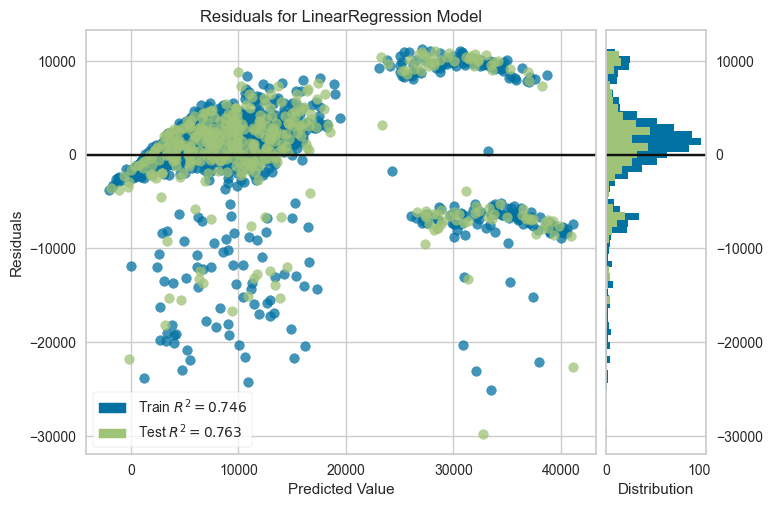

In [5]:
plot_model(lr)

# Experiment 2

In [6]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 55)"
5,Transformed train set shape,"(936, 55)"
6,Transformed test set shape,"(402, 55)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [10]:
# Now access the data properly
print("=== Dataset Information ===")
print(f"Original shape: {get_config('dataset').shape}")
print(f"Training shape: {get_config('X_train').shape}")
print(f"Test shape: {get_config('X_test').shape}")

print("\n=== Column Names ===")
print("Training columns:")
for i, col in enumerate(get_config('X_train').columns):
    print(f"{i+1}. {col}")

=== Dataset Information ===
Original shape: (1338, 7)
Training shape: (936, 6)
Test shape: (402, 6)

=== Column Names ===
Training columns:
1. age
2. sex
3. bmi
4. children
5. smoker
6. region


In [9]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3039.5293,21720096.9303,4660.4825,0.8703,0.3966,0.3151
1,3384.2602,32759917.1539,5723.6280,0.8095,0.4420,0.3094
2,3072.2854,22920993.7135,4787.5875,0.7098,0.5046,0.3892
3,2964.1090,20496809.6307,4527.3402,0.8289,0.4510,0.3895
4,3164.5272,28169962.8911,5307.5383,0.7905,0.5144,0.3008
5,3132.2163,23959302.2104,4894.8240,0.8459,0.3975,0.3017
6,2758.1883,21643172.3047,4652.2223,0.8527,0.3709,0.2948
7,3405.2320,29812968.6639,5460.1253,0.8361,0.4537,0.2914
8,3278.0521,25138670.4229,5013.8479,0.8376,0.4141,0.3537


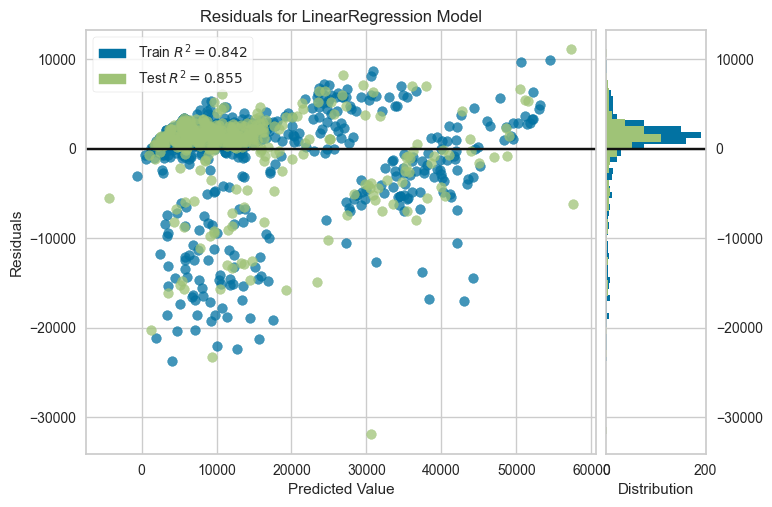

In [11]:
plot_model(lr)

In [12]:
save_model(lr, 'deployment_28042020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                               use_cat_names=True))),
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('bin_numeric_features',
                  TransformerWrapper(include=['age', 'bmi'],
                                     transformer=KBinsDiscretizer(encode='ordinal',
                 

In [13]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Sucessfully Loaded


In [14]:
deployment_28042020

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Levels...
                 ('dummy', Dummify(target='charges')),
                 ('fix_perfect', Remove_100(target='charges')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs',
                  DFS_Classic(interactions

In [16]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

75714.0
